In [1]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir


,0,1
0,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
1,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
2,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
3,11101,PH CRANEOTOMÍA
4,11102,PH CRANEOTOMÍA W/CC
...,...,...
1061,990089,"INAGRUPABLE, DURACIÓN DE LA ESTANCIA NO VÁLIDA"
1062,990099,"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED...."
1063,990119,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."
1064,990129,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."


In [2]:
grd.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA',
       'TIPOALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [3]:
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHA_ALTA',
       'TIPO_ALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA',
       'NOMBRE_HOSPITAL'],
      dtype='object')

In [4]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["COD_HOSPITAL", "NOMBRE_HOSPITAL", "CIP_ENCRIPTADO", "SEXO", "FECHA_NACIMIENTO",
               "SERVICIO_SALUD", "TIPO_INGRESO", "FECHA_INGRESO", "FECHA_ALTA", "TIPO_ALTA",
               "DIAGNOSTICO1", "NOMBRE_IR", "IR_29301_COD_GRD", "IR_29301_PESO", "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [5]:
import pandas as pd

# Para mostrar todas las filas
pd.set_option('display.max_rows', 20)

# Para mostrar todas las columnas
pd.set_option('display.max_columns', 20)


In [6]:
#Vemos quienes murieron y creamos una columna binaria "Fallecido"
falle = grd_f["TIPO_ALTA"] == "FALLECIDO"
grd_f["FALLECIDO"] = falle.astype(int)
grd_f

,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,105102,Hospital Dr. Antonio Tirado Lanas (Ovalle),78111817.0,MUJER,1995-12-06,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,"PH PROCEDIMIENTOS SOBRE ÚTERO Y CUELLO, DILAT...",131111.0,0.5227,1.0,1.0,27.0,3,0
1039583,118100,Hospital Clínico Regional Dr. Guillermo Grant...,76593606.0,MUJER,1991-04-26,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,PA OTROS PROCEDIMIENTOS GINECOLÓGICOS,132340.0,0.1761,0.0,0.0,32.0,0,0
1039584,115100,Hospital Regional de Rancagua,100360940.0,HOMBRE,2015-01-08,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,PH PROCEDIMIENTOS SOBRE APÉNDICE,61131.0,0.7398,1.0,1.0,9.0,2,0
1039585,123100,Hospital Base San José de Osorno,78557002.0,HOMBRE,2014-01-07,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,MH BRONQUIOLITIS Y ASMA,44181.0,0.3452,1.0,1.0,9.0,0,0


In [7]:
grd_f["FALLECIDO"].sum()

25136

In [8]:
# Mostrar la cantidad de filas que contienen valores NaN
len(grd_f[grd_f.isna().any(axis=1)])


2508

In [9]:
grd_f.dropna(inplace=True)

In [10]:
# Mostrar la cantidad de filas que contienen valores NaN
len(grd_f[grd_f.isna().any(axis=1)])

0

In [11]:
# Se definen los rangos etarios (utilizando un valor menor a 0 para que se consideren valores = 0)
bins = [-0.1, 5, 11, 17, 26, 59, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Persona mayor']

# Crear una nueva columna con los rangos etarios
grd_f['AGE_GROUP'] = pd.cut(grd_f['EDAD'], bins=bins, labels=labels, right=True)

print(grd_f[['EDAD', 'AGE_GROUP']])

         EDAD         AGE_GROUP
0        43.0           Adultez
2         3.0  Primera infancia
3        45.0           Adultez
4         0.0  Primera infancia
5        58.0           Adultez
...       ...               ...
1039582  27.0           Adultez
1039583  32.0           Adultez
1039584   9.0          Infancia
1039585   9.0          Infancia
1039586  72.0     Persona mayor

[1037079 rows x 2 columns]


In [12]:
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO',
       'AGE_GROUP'],
      dtype='object')

In [13]:
grd_f.dtypes

COD_HOSPITAL              int64
NOMBRE_HOSPITAL          object
CIP_ENCRIPTADO          float64
SEXO                     object
FECHA_NACIMIENTO         object
SERVICIO_SALUD           object
TIPO_INGRESO             object
FECHA_INGRESO            object
FECHA_ALTA               object
TIPO_ALTA                object
DIAGNOSTICO1             object
NOMBRE_IR                object
IR_29301_COD_GRD        float64
IR_29301_PESO           float64
IR_29301_SEVERIDAD      float64
IR_29301_MORTALIDAD     float64
EDAD                    float64
DIAS_ESTANCIA             int64
FALLECIDO                 int64
AGE_GROUP              category
dtype: object

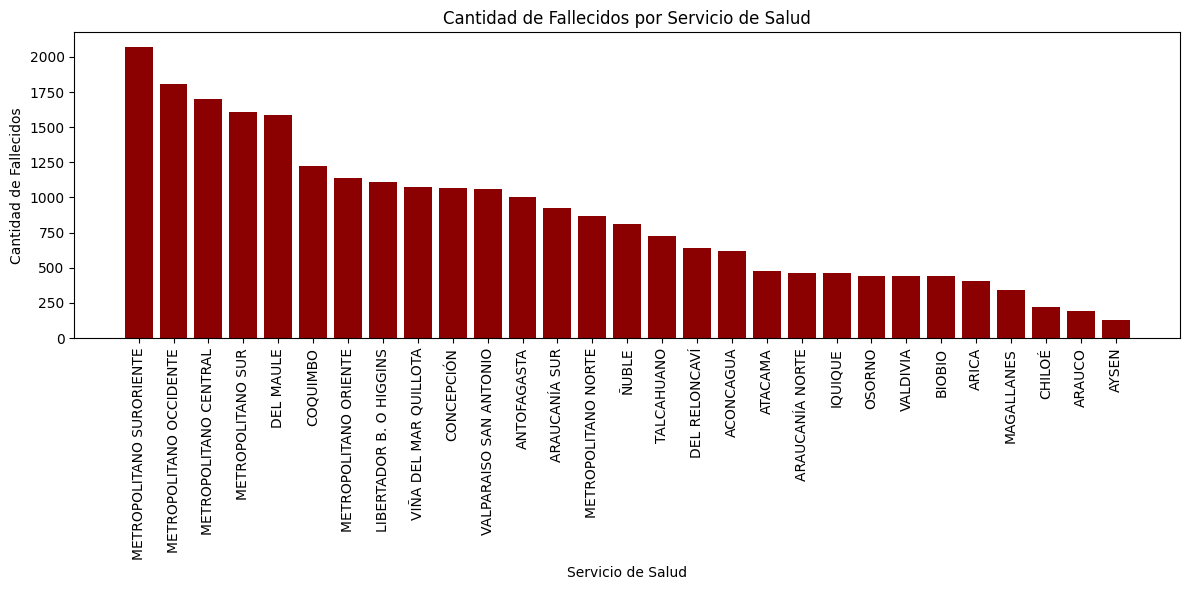

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar y contar fallecidos por SERVICIO_SALUD
fallecidos_por_servicio = grd_f.groupby('SERVICIO_SALUD')['FALLECIDO'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(fallecidos_por_servicio.index, fallecidos_por_servicio.values, color='darkred')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Servicio de Salud')
plt.xlabel('Servicio de Salud')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


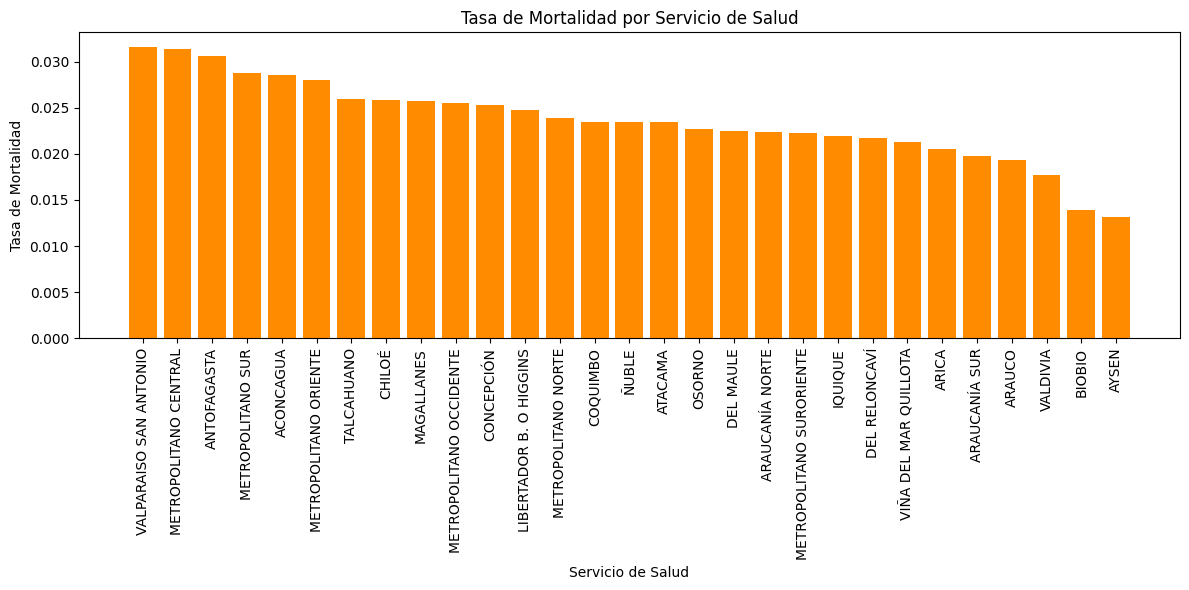

In [15]:
# Agrupar por SERVICIO_SALUD: sumar fallecidos y contar total de pacientes
grupo_servicio = grd_f.groupby('SERVICIO_SALUD').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular tasa de mortalidad y ordenar de mayor a menor
grupo_servicio['tasa_mortalidad'] = grupo_servicio['fallecidos'] / grupo_servicio['total']
grupo_servicio_sorted = grupo_servicio.sort_values(by='tasa_mortalidad', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(grupo_servicio_sorted.index, grupo_servicio_sorted['tasa_mortalidad'], color='darkorange')

# Etiquetas y título
plt.title('Tasa de Mortalidad por Servicio de Salud')
plt.xlabel('Servicio de Salud')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=90)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [16]:
grd_f = grd_f.dropna()

In [17]:
grd_f.drop(["COD_HOSPITAL","NOMBRE_HOSPITAL","CIP_ENCRIPTADO", "SERVICIO_SALUD" ,"FECHA_NACIMIENTO",
        "FECHA_INGRESO","FECHA_ALTA", 'IR_29301_SEVERIDAD','IR_29301_MORTALIDAD'
        ,'IR_29301_COD_GRD', 'IR_29301_PESO',"TIPO_ALTA", "NOMBRE_IR", "DIAGNOSTICO1",], axis=1, inplace= True)

In [18]:
grd_f

,SEXO,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP
0,HOMBRE,URGENCIA,43.0,2,0,Adultez
2,HOMBRE,URGENCIA,3.0,1,0,Primera infancia
3,MUJER,PROGRAMADA,45.0,1,0,Adultez
4,MUJER,URGENCIA,0.0,2,0,Primera infancia
5,MUJER,PROGRAMADA,58.0,0,0,Adultez
...,...,...,...,...,...,...
1039582,MUJER,OBSTETRICA,27.0,3,0,Adultez
1039583,MUJER,PROGRAMADA,32.0,0,0,Adultez
1039584,HOMBRE,URGENCIA,9.0,2,0,Infancia
1039585,HOMBRE,PROGRAMADA,9.0,0,0,Infancia


In [19]:
grd_f["DIAS_ESTANCIA"].max()

696

In [20]:
grd_f.head()

,SEXO,TIPO_INGRESO,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP
0,HOMBRE,URGENCIA,43.0,2,0,Adultez
2,HOMBRE,URGENCIA,3.0,1,0,Primera infancia
3,MUJER,PROGRAMADA,45.0,1,0,Adultez
4,MUJER,URGENCIA,0.0,2,0,Primera infancia
5,MUJER,PROGRAMADA,58.0,0,0,Adultez


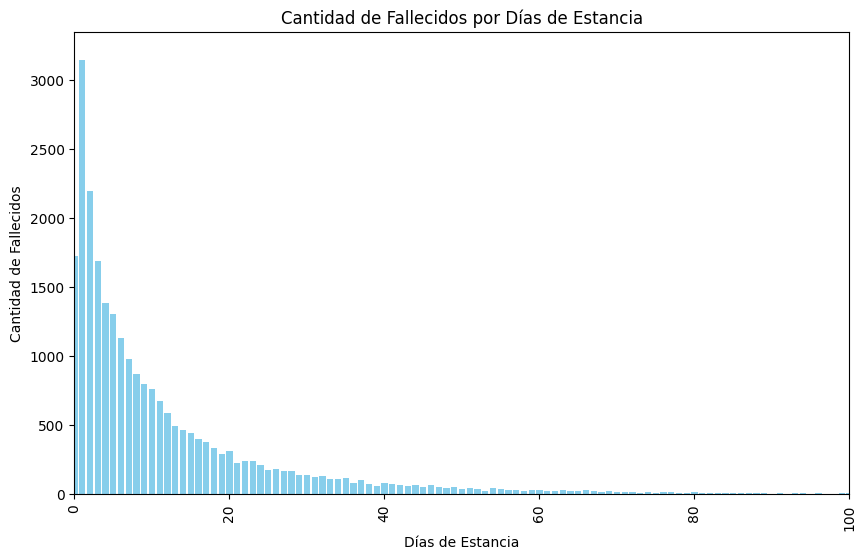

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por DIAS_ESTANCIA y contar la cantidad de fallecidos para cada grupo
fallecidos_por_dia = grd_f.groupby('DIAS_ESTANCIA')['FALLECIDO'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(fallecidos_por_dia['DIAS_ESTANCIA'], fallecidos_por_dia['FALLECIDO'], color='skyblue')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Días de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Cantidad de Fallecidos')

# Ajustar los límites del gráfico en el eje X (hasta el máximo de días de estancia) y en el eje Y (hasta el máximo de fallecidos)
plt.xlim(0, 100)  # Limitar el eje X al máximo de días de estancia
plt.ylim(0, fallecidos_por_dia['FALLECIDO'].max()+200)  # Limitar el eje Y al máximo de fallecidos

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()




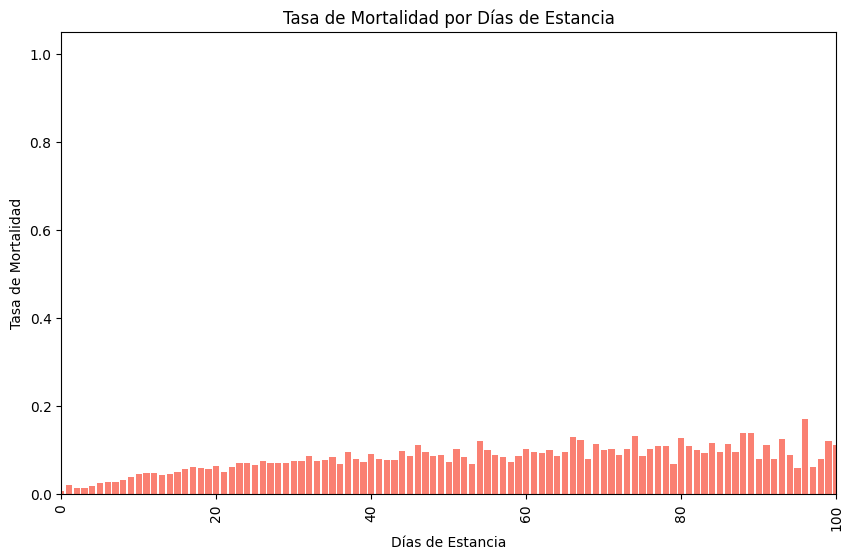

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar los datos por DIAS_ESTANCIA
grupo_dias = grd_f.groupby('DIAS_ESTANCIA').agg(
    fallecidos=('FALLECIDO', 'sum'),  # Sumar los fallecidos (1 = fallecido)
    total_pacientes=('FALLECIDO', 'count')  # Contar el total de pacientes
).reset_index()

# Calcular la tasa de mortalidad
grupo_dias['tasa_mortalidad'] = grupo_dias['fallecidos'] / grupo_dias['total_pacientes']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(grupo_dias['DIAS_ESTANCIA'], grupo_dias['tasa_mortalidad'], color='salmon')

# Añadir etiquetas y título
plt.title('Tasa de Mortalidad por Días de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Mortalidad')

# Ajustar los límites del gráfico en el eje X (hasta el máximo de días de estancia) y en el eje Y (hasta el máximo de tasa de mortalidad)
plt.xlim(0, 100)  # Limitar el eje X al máximo de días de estancia
plt.ylim(0, grupo_dias['tasa_mortalidad'].max() + 0.05)  # Limitar el eje Y hasta el máximo de la tasa de mortalidad

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X si es necesario
plt.show()


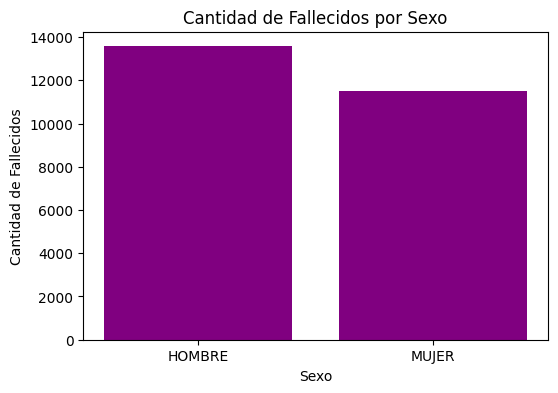

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por SEXO y sumar los fallecidos
fallecidos_por_sexo = grd_f.groupby('SEXO')['FALLECIDO'].sum().reset_index()

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(fallecidos_por_sexo['SEXO'], fallecidos_por_sexo['FALLECIDO'], color='purple')

# Añadir etiquetas y título
plt.title('Cantidad de Fallecidos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Fallecidos')

# Mostrar el gráfico
plt.show()


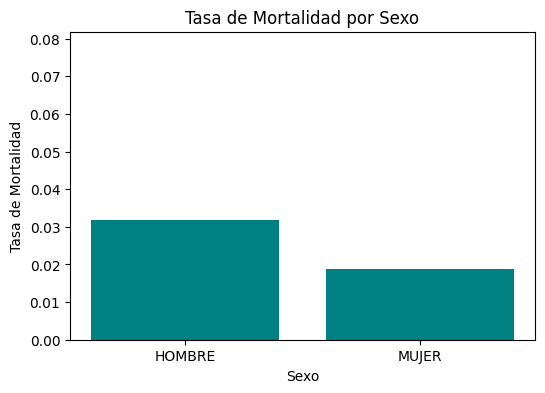

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por SEXO: sumar fallecidos y contar total de pacientes
grupo_sexo = grd_f.groupby('SEXO').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
).reset_index()

# Calcular la tasa de mortalidad
grupo_sexo['tasa_mortalidad'] = grupo_sexo['fallecidos'] / grupo_sexo['total']

# Crear gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(grupo_sexo['SEXO'], grupo_sexo['tasa_mortalidad'], color='teal')

# Etiquetas y título
plt.title('Tasa de Mortalidad por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Mortalidad')

# Mostrar gráfico
plt.ylim(0, grupo_sexo['tasa_mortalidad'].max() + 0.05)
plt.show()


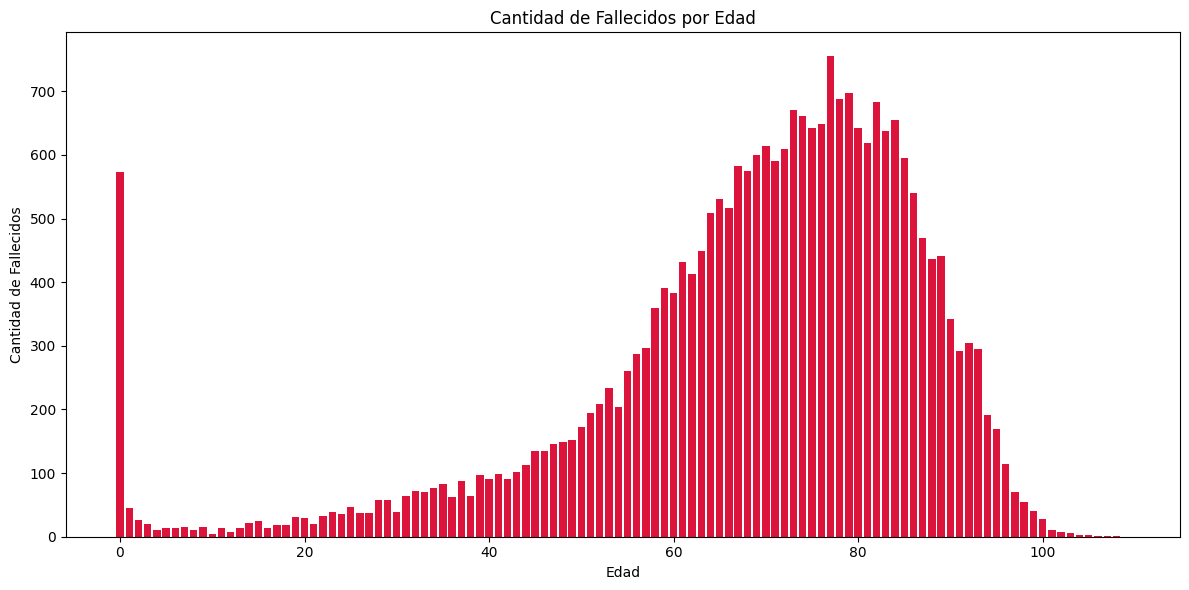

In [25]:
import matplotlib.pyplot as plt

# Agrupar por edad: contar fallecidos (1 = fallecido, 0 = no)
fallecidos_por_edad = grd_f.groupby('EDAD')['FALLECIDO'].sum()

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.bar(fallecidos_por_edad.index, fallecidos_por_edad.values, color='crimson')

# Etiquetas
plt.title('Cantidad de Fallecidos por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Fallecidos')

# Mostrar gráfico
plt.tight_layout()
plt.show()


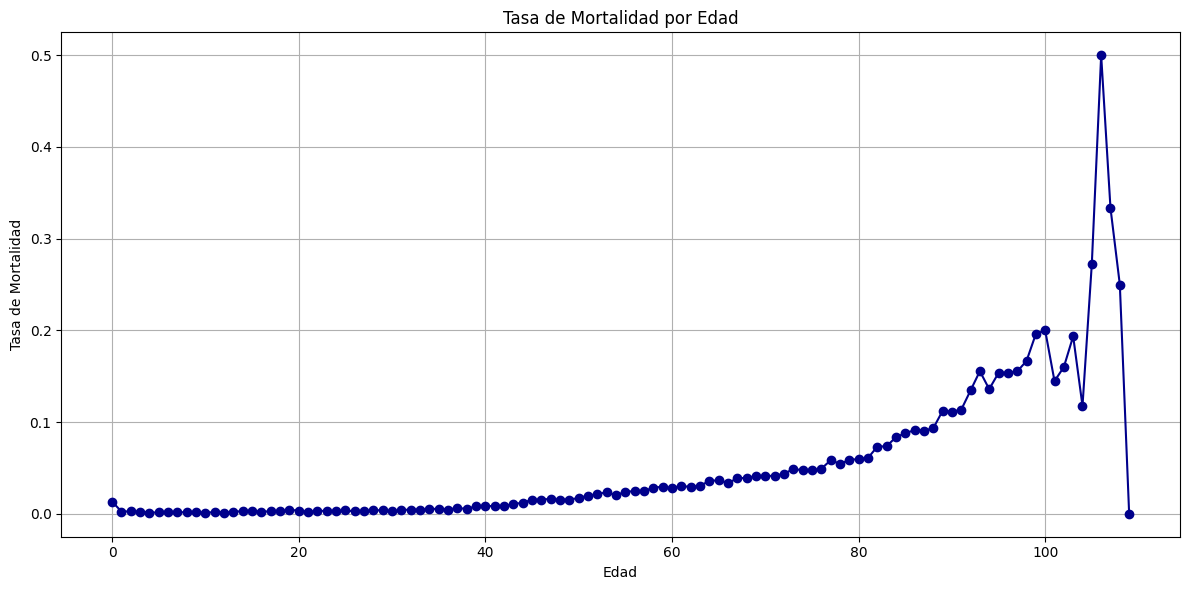

In [26]:
import matplotlib.pyplot as plt

# Agrupar por edad: sumar fallecidos y contar total de pacientes
grupo_edad = grd_f.groupby('EDAD').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular tasa de mortalidad
grupo_edad['tasa_mortalidad'] = grupo_edad['fallecidos'] / grupo_edad['total']

# Crear gráfico
plt.figure(figsize=(12, 6))
plt.plot(grupo_edad.index, grupo_edad['tasa_mortalidad'], marker='o', linestyle='-', color='darkblue')

# Etiquetas
plt.title('Tasa de Mortalidad por Edad')
plt.xlabel('Edad')
plt.ylabel('Tasa de Mortalidad')
plt.grid(True)

# Mostrar gráfico
plt.tight_layout()
plt.show()


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13421/3529823745.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fallecidos_por_grupo = grd_f.groupby('AGE_GROUP')['FALLECIDO'].sum()


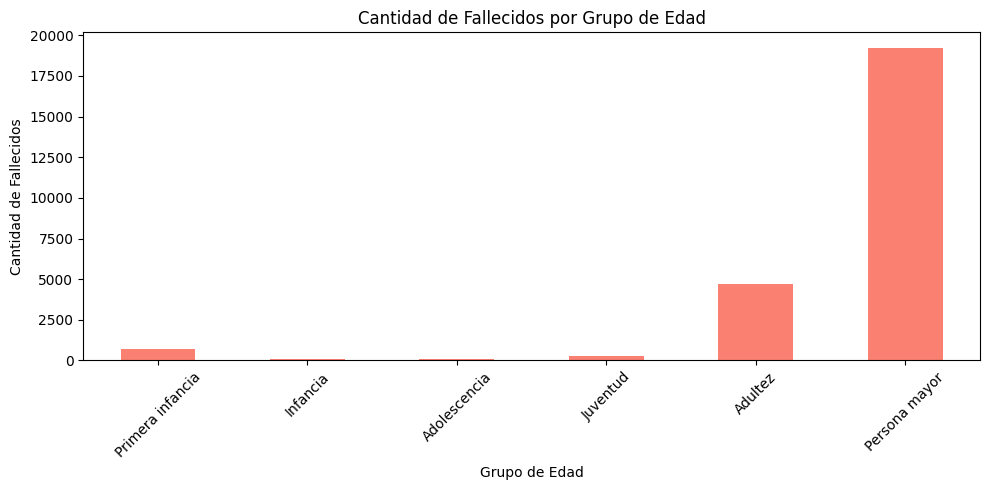

In [27]:
# Agrupar por grupo de edad y contar fallecidos
fallecidos_por_grupo = grd_f.groupby('AGE_GROUP')['FALLECIDO'].sum()

# Graficar
plt.figure(figsize=(10, 5))
fallecidos_por_grupo.plot(kind='bar', color='salmon')

plt.title('Cantidad de Fallecidos por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Fallecidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/hw/8tjnzmw52vbctc3wdkptw00r0000gn/T/ipykernel_13421/1763451484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = grd_f.groupby('AGE_GROUP').agg(


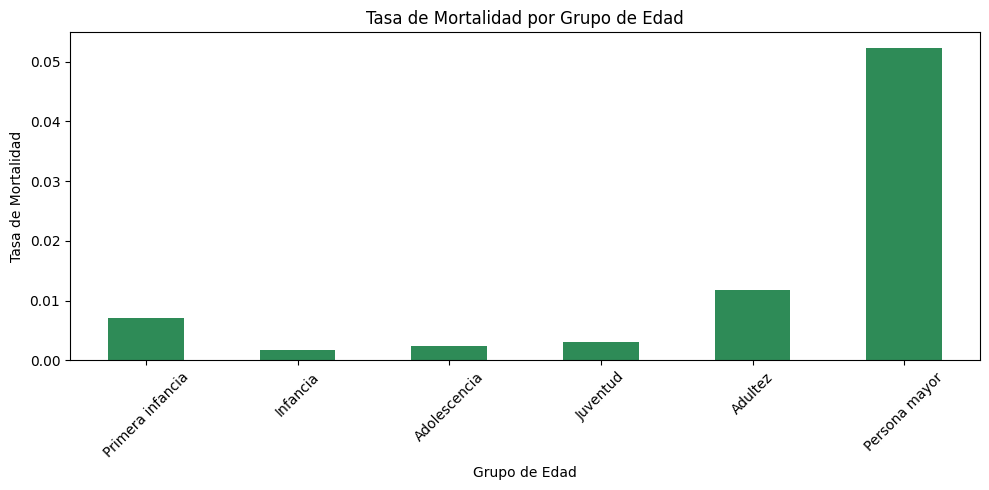

In [28]:
# Agrupar por grupo de edad y calcular fallecidos y total de pacientes
grupo = grd_f.groupby('AGE_GROUP').agg(
    fallecidos=('FALLECIDO', 'sum'),
    total=('FALLECIDO', 'count')
)

# Calcular la tasa
grupo['tasa_mortalidad'] = grupo['fallecidos'] / grupo['total']

# Graficar
plt.figure(figsize=(10, 5))
grupo['tasa_mortalidad'].plot(kind='bar', color='seagreen')

plt.title('Tasa de Mortalidad por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Mortalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
a = pd.get_dummies(grd_f)

In [30]:
a["FALLECIDO"].sum()

25060

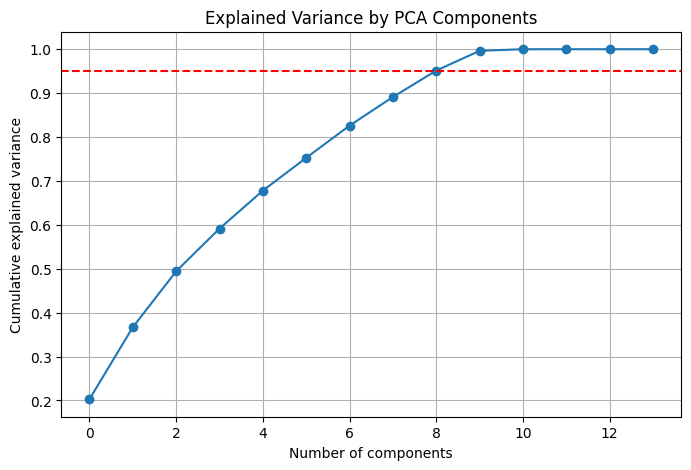

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = a.copy()  

#Estandarizacion
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Graficar el PCA acumulado
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold
plt.title('Explained Variance by PCA Components')
plt.show()


In [32]:
# Check explained variance ratio after column removal
print(pca.explained_variance_ratio_)


[2.02729826e-01 1.64005500e-01 1.27454517e-01 9.73071715e-02
 8.64731945e-02 7.46787710e-02 7.34461540e-02 6.51413675e-02
 6.01988549e-02 4.49484528e-02 3.61619038e-03 5.47784801e-16
 4.03935708e-16 0.00000000e+00]


In [33]:
# The loadings are the components of the PCA model
loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(loadings)



                                 PC1       PC2       PC3       PC4       PC5  \
EDAD                       -0.304650  0.513499 -0.174866  0.129073  0.095185   
DIAS_ESTANCIA              -0.142562 -0.114181 -0.306661  0.123456  0.019667   
FALLECIDO                  -0.131130  0.025686 -0.227603  0.060711  0.068045   
SEXO_HOMBRE                -0.410807 -0.247931  0.317177  0.148375  0.359185   
SEXO_MUJER                  0.410807  0.247931 -0.317177 -0.148375 -0.359185   
TIPO_INGRESO_OBSTETRICA     0.416466  0.014584 -0.141567  0.004345  0.410221   
TIPO_INGRESO_PROGRAMADA    -0.007283  0.340937  0.559604 -0.100841 -0.173201   
TIPO_INGRESO_URGENCIA      -0.289288 -0.336254 -0.434188  0.093297 -0.126256   
AGE_GROUP_Primera infancia -0.017918 -0.405484  0.026362 -0.192987 -0.386936   
AGE_GROUP_Infancia         -0.005155 -0.156628  0.222733 -0.160753 -0.081031   
AGE_GROUP_Adolescencia      0.012292 -0.132420  0.093880 -0.153544 -0.180610   
AGE_GROUP_Juventud          0.209044 -0.